In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import textwrap
from sklearn.metrics import mean_absolute_error

C:\Users\Clare\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# Get the data
data_df=pd.read_csv(XXXXX,encoding = "ISO-8859-1")



In [3]:
# Define support and engage
data_df['Likeliness to support']=xxxxx
data_df['Likeliness to engage']=xxxxx


ycol='Likeliness to support'
zcol='Likeliness to engage'

In [6]:
# get rid of non-responses that are not recognised by Python
for i in range(len(data_df)):
    if data_df.loc[i,'Did you vote in the recent council elections that took place on Thursday 3rd May 2018?']=='No':
        data_df.loc[i,'Who did you vote for in that election?']='Did not vote'
colstonan=[xxxxx]
outputnan={xxx: np.nan, 'Letter ':'Letter', '-':np.nan}
data_df[colstonan]=data_df[colstonan].replace(outputnan)

In [7]:
# further cleansing etc to make it all make sense
demcols=xxxxx
binarycols=xxxxx
agreecols=xxxx
# create a dictionary with keys = old-datapoints, values = corresponding new-datapoints
output = {'no': '0', 'No':'0', 'yea': '10', 'yes':'10','Yes':'10', 'R': np.nan, 'Not heard of it':np.nan, 'refused':np.nan, 
          'REFUSED':np.nan, 'null':np.nan, 'Leaflet ':'Leaflet', 'Letter ':'Letter', '-':np.nan, 'prefer_not_to_say':np.nan,
          'There were not local elections in my area':np.nan, 'Strongly Agree':9.5, 'Agree':7, "Don't Know":5, "Disagree":2.5, "Strongly Disagree":0.5}

# the following line with replace all values for all the specified columns
data_recoded[binarycols] = data_recoded[binarycols].replace(output)
data_df[demcols]=data_df[demcols].replace(output)
data_recoded[demcols]=data_recoded[demcols].replace(output)
data_recoded[agreecols]=data_recoded[agreecols].replace(output)

# change data-types for all columns at same time, if you do it row by row, column with still have the 'object' datatype, which is slower than int or float (dont worry if that sentence doesn't make sense yet)
data_recoded[binarycols] = data_recoded[binarycols].astype(float)
data_recoded[agreecols] = data_recoded[agreecols].astype(float)

In [9]:
# makes binary columns for each category in categorical data columns
def catcols(df, ignore=None, value=10):
    data=df.copy()
    cols = []
    cats = []
    newcols = []
    if ignore:
        for i in data.columns:
            if not (i in ignore):
                cols.append(i)
            #if i in ignore:
             #   cols.remove(i)
    for i in cols:
        a=data.loc[0,i]
        if type(a)==str:
            cats.append(i)
    for i in cats:
        print(i)
        for j in range(len(data)):
            try:
                data.loc[j,i] = data.loc[j,i].lower()
            except AttributeError:
                continue
        responses = data[i].unique()
# this doesn't work - I don't know how to avoid creating nan columns for each question
        #        if nan in responses:
 #           print('found a nan')
  #          responses.remove(nan)
        for j in range(len(data)):
            for k in responses:
                if data.loc[j,i]==k:
                    data.loc[j,k]=10
                else:
                    data.loc[j,k]=0
        for k in responses:
            data[k]=pd.DataFrame(data[k],dtype='float')
        data.drop([i], axis=1, inplace=True)
    return data
                    

In [11]:
b=catcols(data_df[[xxxxx, if required]], ignore=[ycol, zcol])
bcareer=catcols(data_recoded[['Career','Likeliness to support', 'Likeliness to engage']], ignore=[ycol, zcol])

Region
Gender
Age
Who did you vote for in that election?
Marital Status
Number of children
Education
Employment Status
Income
Career
Which political party do you believe most strongly shares your priorities when it comes to development
To what extent do you have faith in the following organisations to deliver your priorities, when it comes to development?
Which of the following best describes your living arrangements?
Thinking about planning consultations, how would you prefer to be engaged in the process?
How did you vote in the 2016 EU Referendum?
Which of the following comes closest to your current view on Brexit?
What do you think the Mayor of London, Sadiq Khans current priority is?


In [ ]:
# define various subsets of b if you like, and create labels arrays, which have the labels of the points (do this manually)
vartograph=[var_b_q3, var_b_demographic, var_b_elections]
labtograph=[lab_b_q3, lab_b_demographic, lab_b_elections]

In [ ]:
# remember to delete the ones that shouldn't be included for analysis from the b subsets 
# This is easier if you've put them in as 'ignore' at the beginning
# Then you just have to delete them from the beginning of the list
# also delete support and engage, and ref and nans



In [128]:

        
def label_point(x, y, val, ax, p=0.0025, q=0, numbered=False):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    if numbered:
        for i, point in a.iterrows():
            ax.text(point['x']+p, point['y']-q, str(i+1))
    else:
        for i, point in a.iterrows():
            ax.text(point['x']+p, point['y']-q, str(point['val']))

In [129]:
def ci_zero(y,x,s):

    
    w=False
    mod = sm.OLS(y, sm.add_constant(x))
    res=mod.fit()
    ci=pd.DataFrame(res.conf_int(alpha=s))


    if ci.iloc[1,0]*ci.iloc[1,1]<0:
        w=True
    
    return w

def conf_zero(data, variables, labels):
    warn_y=[]
    warn_z=[]
    if len(variables)!=len(labels):
        return(print('len labels not equal to len variables'))
    for i in range(len(variables)):
        dat=data[[ycol,zcol,variables[i]]]
        dat.dropna(inplace=True)
        wy=ci_zero(dat[ycol], dat[variables[i]], 0.05)
        wz=ci_zero(dat[zcol], dat[variables[i]], 0.05)
        if wy:
            warn_y.append(labels[i])
        if wz:
            warn_z.append(labels[i])
    return warn_y, warn_z

def confidence_warn(data, variables, labels)
    (sup, eng)=conf_zero(data, variables, labels)
    one=[]
    both=[]
    notboth=lab_b_demographic.copy()
    for i in sup:
        if i in eng:
            both.append(i)
            eng.remove(i)
            notboth.remove(i)
        else:
            one.append(i)
    one+=eng
    print('both:'+'\n',both)
    print('one:'+'\n',one)
    print('not both:'+'\n',notboth)

In [130]:
#find and plot regressions
def plotregs(data, variables, labels, numbered=False, save=None, offset = None, aspect=1):
    R=np.zeros((len(variables),2))
    for i in range(len(data)):
        data.loc[i,'null']=0
    j=0
    for i in variables:
        dat=data[[i,'null', ycol,zcol]]
        dat.dropna(axis=0,how='any', inplace=True) # this doesn't seem to work, so recode NaNs as 5s for these.....
        Yodel=LinearRegression().fit(X=dat[[i,'null']],y=dat[ycol])
        Zodel=LinearRegression().fit(X=dat[[i, 'null']],y=dat[zcol])
        R[j,0]=Yodel.coef_[0]
        R[j,1]=Zodel.coef_[0]
        j+=1
    rdata=pd.DataFrame(R, columns=[ycol,zcol])
    dX=pd.DataFrame(labels, columns=['factors'])
    if numbered:
        for i in range(len(dX)):
            dX.iloc[i,0]=str(i+1)+':'+str(dX.iloc[i,0])
    regdata=pd.concat([rdata,dX],axis=1)
     
    if numbered:
        g=sns.lmplot(ycol,zcol,regdata,hue='factors',fit_reg=False, size=10, sharex=False,sharey=False, aspect=aspect)
    else:
        g=sns.lmplot(ycol,zcol,regdata,hue='factors',fit_reg=False, size=10, sharex=False,sharey=False, legend=False, aspect=aspect)

  #  g.set(xlim=(-0.4,0.6), ylim=(-.4,0.6))
    if offset:
        for j in range(len(offset)):
            for i in range(len(regdata)):
                if regdata.loc[i,'factors'] in offset[j][0]:
                    regdata.loc[i,'offset'+str(j)]=regdata.loc[i,'factors']
                    regdata.loc[i,'factors'] = ' '
                else:
                    regdata.loc[i,'offset'+str(j)] = ' '
            label_point(regdata[ycol], regdata[zcol], regdata['offset'+str(j)], plt.gca(),p=offset[j][1], q=offset[j][2], numbered=numbered) 

        label_point(regdata[ycol], regdata[zcol], regdata['factors'], plt.gca(), numbered=numbered) 
    else:
        label_point(regdata[ycol], regdata[zcol], regdata['factors'], plt.gca(), numbered=numbered) 
    plt.title('Regression Coefficients', fontsize=12)

    plt.axvline(0)
    plt.axhline(0)

    if save:
        plt.savefig(save, dpi=800)
        
    

In [131]:
#find and plot regressions
def plotregs2(data, variables, labels, numbered=False, save=None, offset = None, aspect=1):
    R=np.zeros((len(variables),2))
    j=0
    for i in variables:
        Yodel=sm.OLS(regs['Likeliness to support'], sm.add_constant(regs[i]))
        R[j,0]=Yodel.fit().params[1]
        Zodel=sm.OLS(regs['Likeliness to support'], sm.add_constant(regs[i]))
        R[j,0]=Zodel.fit().params[1]
        j+=1
    rdata=pd.DataFrame(R, columns=[ycol,zcol])
    dX=pd.DataFrame(labels, columns=['factors'])
    if numbered:
        for i in range(len(dX)):
            dX.iloc[i,0]=str(i+1)+':'+str(dX.iloc[i,0])
    regdata=pd.concat([rdata,dX],axis=1)
     
    if numbered:
        g=sns.lmplot(ycol,zcol,regdata,hue='factors',fit_reg=False, size=10, sharex=False,sharey=False, aspect=aspect)
    else:
        g=sns.lmplot(ycol,zcol,regdata,hue='factors',fit_reg=False, size=10, sharex=False,sharey=False, legend=False, aspect=aspect)

    g.set(xlim=(-0.4,0.6), ylim=(-.4,0.6))
    if offset:
        for j in range(len(offset)):
            for i in range(len(regdata)):
                if regdata.loc[i,'factors'] in offset[j][0]:
                    regdata.loc[i,'offset'+str(j)]=regdata.loc[i,'factors']
                    regdata.loc[i,'factors'] = ' '
                else:
                    regdata.loc[i,'offset'+str(j)] = ' '
            label_point(regdata[ycol], regdata[zcol], regdata['offset'+str(j)], plt.gca(),p=offset[j][1], q=offset[j][2], numbered=numbered) 

        label_point(regdata[ycol], regdata[zcol], regdata['factors'], plt.gca(), numbered=numbered) 
    else:
        label_point(regdata[ycol], regdata[zcol], regdata['factors'], plt.gca(), numbered=numbered) 
    plt.title('Regression Coefficients', fontsize=12)

    plt.axvline(0)
    plt.axhline(0)

    if save:
        plt.savefig(save, dpi=800)
        
    

In [132]:

for i in range(len(vartograph)):

    print (i)
    plotregs(b,vartograph[i], labtograph[i],numbered=True, save=str(i))


In [135]:
plotregs(b, var, lab, offset=((['label 1', 'label 2'],0.003,0.005), (['label 3'],0.003,0.007),save='save name')

In [ ]:
# how to see which are not statistically significant
# could improve this by building it into the confidence interval function


In [ ]:
confidence_warn(b, var_b_elections, lab_b_elections)

In [116]:
# keep q3 so all of b_q3
# b_demographic
# remove marital status
# later examine age differently
bage=pd.concat([b,data_recoded['Age']], axis=1)
bage.drop(['single','married','divorced','separated','living_with_partner','widowed', '18 - 24',
                                                                                      '14 - 17',
                                                                                      '25 - 34',
                                                                                      '35 - 44',
                                                                                      '45 - 54',
                                                                                         '> 54'], axis=1, inplace=True)



In [117]:
age_scores = {'18 - 24':2, '14 - 17':0, '25 - 34':4, '35 - 44':6, '45 - 54':8, '> 54':10}
bage['Age']=bage['Age'].replace(age_scores)
bage['Young']=10-bage['Age']
# recode children to make binary
bage['Children']=bage['one']+bage['two']+bage['three']+bage['four']+bage['five']+bage['six_or_more']
bage.drop(['one','two','three','four','five','six_or_more'], axis=1, inplace=True)
# split income into 3 brackets
bage['Lower income']=bage['lower_i']+bage['lower_ii']
bage['Middle income']=bage['middle_i']+bage['middle_ii']
bage['High income']=bage['high_i']+bage['high_ii']+bage['high_iii']
bage.drop(['lower_ii','lower_i','high_i','high_iii','middle_i', 'middle_ii'], axis=1, inplace=True)
# remove employment status unless retired
bage=bage.rename(index=str, columns={"other": "voted other", "the conservative party": "voted Consevative", 
                                "the labour party": "voted Labour", "the liberal democrats":"voted Lib Dem",
                               "the green party":"Voted Green"})

In [16]:
support=data_df[data_df[ycol]>6]
oppose=data_df[data_df[ycol]<4]
neutral_sup=data_df[data_df[ycol]>3][data_df[ycol]<7]

C:\Users\Clare\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
import textwrap

In [75]:
def supoppbars(col,la=0.2, ra=0.6, height=0.9):
# normal horizontal text
    #fig=plt.figure(figsize=(8,5))
 #   ax=fig.add_axes([.05,.1,.85,.75])
    
 # employment status has size 8, 7 axes [.05,.3,.85,.65]
# "Thinking about planning consultations, how would you prefer to be engaged in the process?" size 8, 7 axes [.05,.3,.85,.6]
#To what extent do you have faith in the following organisations to deliver your priorities, when it comes to development? as above


    fig=plt.figure(figsize=(8,6))
    ax=fig.add_axes([.05,.23,.85,.73])
    
#    (left, right) = fig.subplots(1, 2)
 #   fig.subplots_adjust(wspace=.3)
#    fig=plt.figure(figsize=(8, 4.2))
 #   left=fig.add_axes([.08,.08,.35,.85])
  #  right=fig.add_axes([.45,.05,.5,.85])
    b=support[[col,'ID']].groupby(col).count()
    x=np.arange(len(b))
    a=oppose[[col,'Postal Code']].groupby(col).count()
    n=neutral_sup[[col, 'City']].groupby(col).count()
    c=pd.concat([a,b,n], axis=1)
    # FOR AGE, keep this one!!
#    c.sort_values(by='Ref',inplace=True)
    p2=ax.bar(x+0.2,c['ID'], width=0.2, align='center', color='g')
 #   
    p1=ax.bar(x-0.2,c['Postal Code'], width=0.2, align='center', color='r')
    p3 = ax.bar(x, c['City'], width=0.2, align='center', color='b')
#    plt.xticks(x,c.index)
    
    xlabs=[]
    for i in c.index:
        xlabs.append("\n".join(textwrap.wrap(i, 20)))
    plt.xticks(x,xlabs)
    #plt.xticks(x,xlabs, rotation='vertical')
    
    
#   # fig.text(la,height, 'Unikely to support (117)',size=13)
    ax.set_title("\n".join(textwrap.wrap(str(col),80)))

    
    plt.legend([p2, p1, p3], ["Likely to support", "Unlikely to support", "Neutral"])
    try:
        fig.savefig('joint bars '+str(col)[:30]+'.png')
    except FileNotFoundError:
        try:
            fig.savefig('joint bars '+str(col)[:20]+'.png')
        except FileNotFoundError:
            fig.savefig('joint bars for col number '+str(data_df.columns.get_loc(col))+'.png')

In [27]:
def supoppbars_reorder(col,la=0.2, ra=0.6, height=0.9):
#    (left, right) = fig.subplots(1, 2)
 #   fig.subplots_adjust(wspace=.3)
#    fig=plt.figure(figsize=(8, 4.2))
 #   left=fig.add_axes([.08,.08,.35,.85])
  #  right=fig.add_axes([.45,.05,.5,.85])
    b=support[[col,'ID']].groupby(col).count()
    x=np.arange(len(b))
    a=oppose[[col,'Postal Code']].groupby(col).count()
    n=neutral_sup[[col, 'City']].groupby(col).count()
    c=pd.concat([a,b,n], axis=1)
    
    print(c)
    order=[]
    for i in range(len(b)):
        print('\n The next one is '+c.index[i])
        order.append(int(input("Where should the first/next one go? Numbers start from 0")))
    print(order)
    x=np.array(order)
    print(x)
    # FOR AGE, keep this one!!
#    c.sort_values(by='Ref',inplace=True)
    fig=plt.figure(figsize=(10,5))
    ax=fig.add_axes([.05,.1,.85,.75])
    

    p2=ax.bar(x+0.2,c['ID'], width=0.2, align='center', color='g')
    
    p1=ax.bar(x-0.2,c['Postal Code'], width=0.2, align='center', color='r')
    p3 = ax.bar(x, c['City'], width=0.2, align='center', color='b')
    plt.xticks(x,c.index)
#   # fig.text(la,height, 'Unikely to support (117)',size=13)
    ax.set_title("\n".join(textwrap.wrap(str(col),80)))

    
    plt.legend([p2, p1, p3], ["Likely to support", "Unlikely to support", "Neutral"])
    try:
        fig.savefig('joint bars '+str(col)[:30]+'.png')
    except FileNotFoundError:
        try:
            fig.savefig('joint bars '+str(col)[:20]+'.png')
        except FileNotFoundError:
            fig.savefig('joint bars for col number '+str(data_df.columns.get_loc(col))+'.png')

Q6.6= We need to build low-rise, attractive housing that people actually want to live in.
                                                    Postal Code   ID  City
Q6.6= We need to build low-rise, attractive hou...                        
Agree                                                        69  341   127
Disagree                                                     14   46    25
Don't Know                                                   19   88    50
Strongly Agree                                               27  231    67
Strongly Disagree                                             6    8     4
The next one is Agree
Where should the first/next one go? Numbers start from 01
The next one is Disagree
Where should the first/next one go? Numbers start from 03
The next one is Don't Know
Where should the first/next one go? Numbers start from 02
The next one is Strongly Agree
Where should the first/next one go? Numbers start from 00
The next one is Strongly Disagree
Where should t

The next one is four
Where should the first/next one go? Numbers start from 04
The next one is one
Where should the first/next one go? Numbers start from 01
The next one is six_or_more
Where should the first/next one go? Numbers start from 06
The next one is three
Where should the first/next one go? Numbers start from 03
The next one is two
Where should the first/next one go? Numbers start from 02
The next one is zero
Where should the first/next one go? Numbers start from 00
[5, 4, 1, 6, 3, 2, 0]
[5 4 1 6 3 2 0]


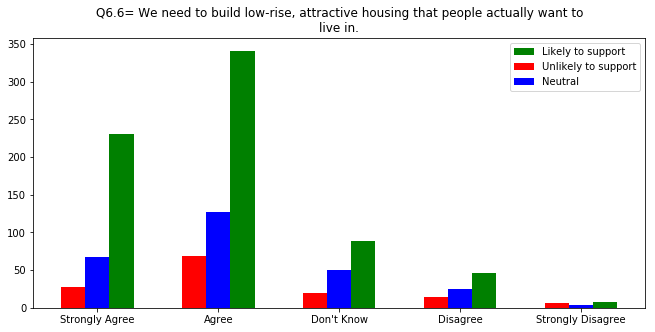

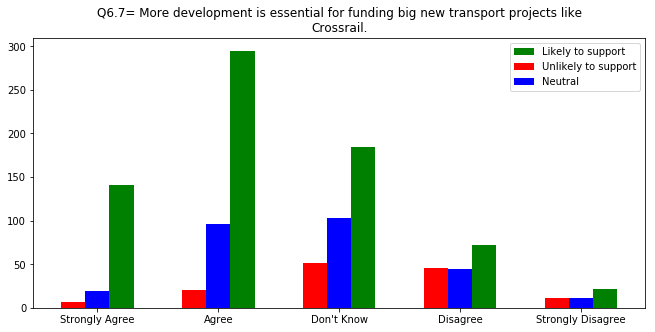

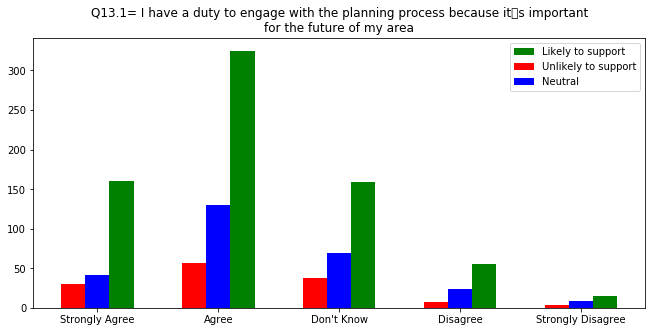

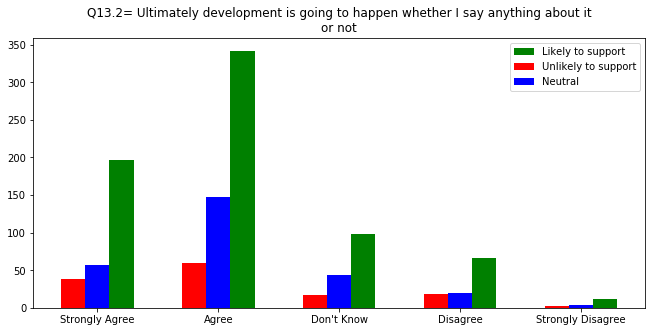

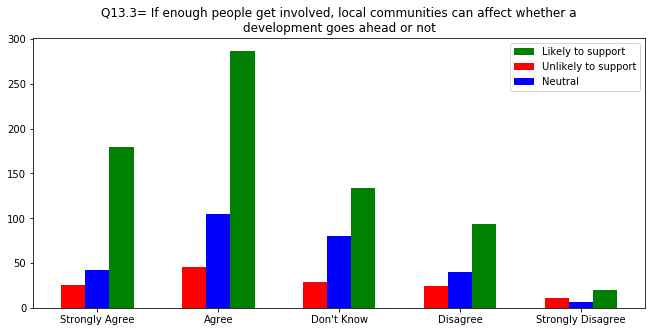

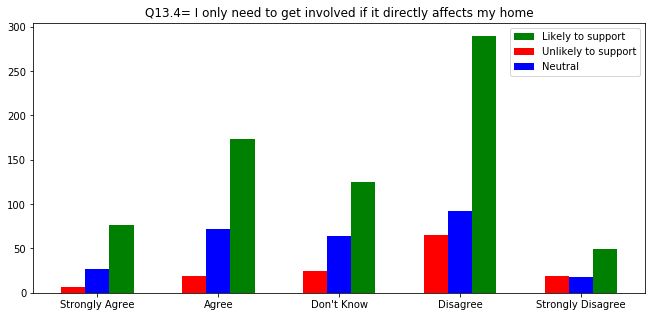

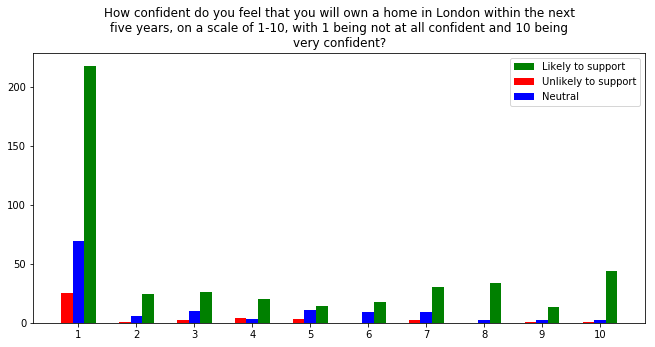

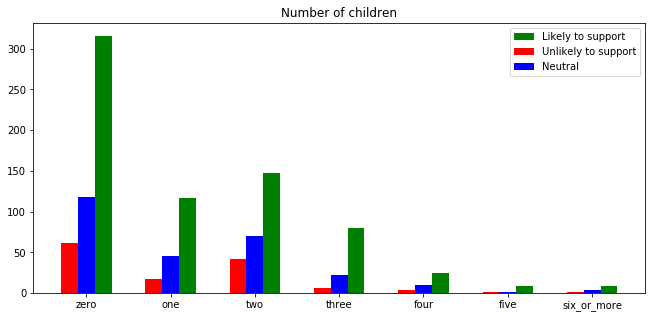

In [26]:
reorder_cols=[xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx]
for i in reorder_cols[5:]:
    print(i)
    supoppbars_reorder(i)

In [ ]:
def sup_opp_pies(col,la=0.1, ra=0.6, height=0.7):
    fig, (left, right) = plt.subplots(1, 2)
    fig.subplots_adjust(wspace=2)
#fig=plt.figure(figsize=(8, 4.2))
#left=fig.add_axes([.05,.05,.35,.85])
#right=fig.add_axes([.45,.05,.75,.85])
    a=oppose[[col,'Gender']].groupby(col).count()
    left.pie(a, labels=a.index)
    left.axis('equal')
    fig.text(la,height, 'Unikely to support (117)',size=13)

    b=support[[col,'Gender']].groupby(col).count()
    right.pie(b, labels=b.index)
    right.axis('equal')
    fig.text(ra,height, 'Likely to support (882)', size=13)
    fig.savefig('pies '+str(col))

In [ ]:
mod = sm.OLS(b[ycol], sm.add_constant(b['Question 5']))
mod.fit().params[1]

In [ ]:
mod=sm.OLS(regs['Likeliness to support'], sm.add_constant(regs['home owner without mortgage']))
mod.fit().params[1]

In [ ]:
mod=LinearRegression().fit(X,Y)
mod.coef_